In [14]:
### basic
import sys
sys.path.append('../')
from config_sing import *
from config_func import *

In [8]:
import umap
from sklearn.manifold import TSNE

In [2]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_output_ASTARR_zoom1.csv"
fpath = os.path.join(fdiry, fname)
dat_astarr = pd.read_csv(fpath)

print(dat_astarr.shape)
dat_astarr.head()

(120000, 281)


,Sample,Count,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,Output_rep1,1,chrX_48780151_48780425,chrX,48780151,48780425,48780288,0.405109,-13.575177,-14.434689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
dat_astarr.columns[1:12]

Index(['Count', 'Fragment', 'Chrom', 'Start', 'End', 'Loc', 'Pct_GC', 'Input',
       'Output', 'Log2fc', 'Mtf_FOX/1'],
      dtype='object')

In [3]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_output_TileMPRA_zoom1.csv"
fpath = os.path.join(fdiry, fname)
dat_tmpra = pd.read_csv(fpath)

print(dat_tmpra.shape)
dat_tmpra.head()

(10000, 281)


,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,Log2fc,Mtf_GRHL,...,Mtf_CREB/ATF/3,Mtf_ZNF435,Mtf_HD/19,Mtf_MYB/1,Mtf_ZBED1,Mtf_ARI5B,Mtf_HINFP1/2,Mtf_MYB/4,Mtf_GMEB2/1,Mtf_HINFP1/3
0,chrX_47786601_47786800,chrX,47786601,47786800,47786701,0.346734,2102.916335,2202.384549,0.066700,7.9452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chrX_47787901_47788100,chrX,47787901,47788100,47788001,0.427136,861.235634,1065.590162,0.305847,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chrX_47788551_47788750,chrX,47788551,47788750,47788651,0.422111,64.687094,78.172043,0.279845,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chrX_47788951_47789150,chrX,47788951,47789150,47789051,0.577889,664.327710,2001.708558,1.590553,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chrX_47789101_47789300,chrX,47789101,47789300,47789201,0.608040,749.682266,38769.994562,5.692439,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(270,)
(270,)


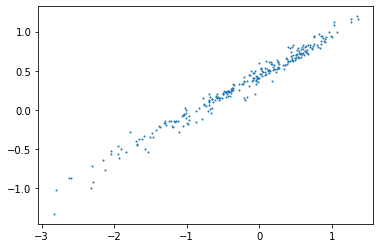

In [81]:
dat = dat_astarr
lst = [col for col in dat.columns if col.startswith('Mtf')]
df1 = dat[lst]

x = df1.apply(lambda x: np.mean(x))
y = df1.apply(lambda x: np.std(x))

print(x.shape)
print(y.shape)
plt.scatter(x=np.log10(x), y=np.log10(y), s=1)

(272,)
(272,)


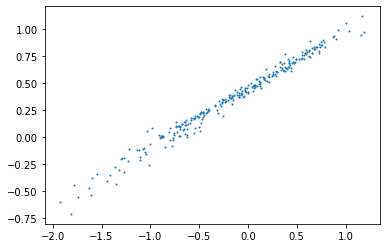

In [80]:
dat = dat_tmpra
lst = [col for col in dat.columns if col.startswith('Mtf')]
df2 = dat[lst]

x = df2.apply(lambda x: np.mean(x))
y = df2.apply(lambda x: np.std(x))

print(x.shape)
print(y.shape)
plt.scatter(x=np.log10(x), y=np.log10(y), s=1)

In [88]:
dat = dat_astarr
lst = [col for col in dat.columns if col.startswith('Mtf')]
dat = dat[lst]
print(dat.shape)

x   = dat.apply(lambda x: np.mean(x))
n   = int(len(x) * 0.1)
j   = x.nlargest(n).index.to_numpy()
dat = dat.loc[:,j]
print(dat.shape)

x   = dat.apply(lambda x: np.sum(x), axis=1)
i   = x > 1e-5
dat = dat.loc[i,:]
print(dat.shape)

df1_sub = dat
df1_sub.head()

(120000, 270)
(120000, 27)
(119650, 27)


,Mtf_KLF/SP/2,Mtf_GC-tract,Mtf_NR/3,Mtf_KLF/SP/1,Mtf_ETS/2,Mtf_EGR,Mtf_E2F/2,Mtf_CTCF,Mtf_ZIC/2,Mtf_TFAP2/1,...,Mtf_Ebox/CACGTG/2,Mtf_Ebox/CACCTG,Mtf_MZF1,Mtf_NR/16,Mtf_ZNF143,Mtf_NR/1,Mtf_ZNF324,Mtf_ZFX,Mtf_ETS/1,Mtf_ZNF320
0,3.1318,0.000000,8.7027,12.1857,0.0,0.0,0.0,0.000,16.7545,10.586,...,6.5579,5.42190,0.0,0.0000,5.8099,0.0,0.0000,9.3149,0.0,5.7643
1,22.4533,47.100125,7.4726,14.4943,0.0,0.0,0.0,10.184,0.0000,15.575,...,8.9088,9.23595,0.0,9.7482,8.4038,0.0,7.2304,0.0000,0.0,10.8839
2,22.4533,47.100125,7.4726,14.4943,0.0,0.0,0.0,10.184,0.0000,15.575,...,8.9088,9.23595,0.0,9.7482,8.4038,0.0,7.2304,0.0000,0.0,10.8839
3,22.4533,47.100125,7.4726,14.4943,0.0,0.0,0.0,10.184,0.0000,15.575,...,8.9088,9.23595,0.0,9.7482,8.4038,0.0,7.2304,0.0000,0.0,10.8839
4,22.4533,47.100125,7.4726,14.4943,0.0,0.0,0.0,10.184,0.0000,15.575,...,8.9088,9.23595,0.0,9.7482,8.4038,0.0,7.2304,0.0000,0.0,10.8839


In [84]:
dat = dat_tmpra
lst = [col for col in dat.columns if col.startswith('Mtf')]
dat = dat[lst]
print(dat.shape)

x   = dat.apply(lambda x: np.mean(x))
n   = int(len(x) * 0.1)
j   = x.nlargest(n).index.to_numpy()
dat = dat.loc[:,j]
print(dat.shape)

x   = dat.apply(lambda x: np.sum(x), axis=1)
i   = x > 1e-5
dat = dat.loc[i,:]
print(dat.shape)

df2_sub = dat
df2_sub.head()

(10000, 272)
(10000, 27)
(9932, 27)


,Mtf_KLF/SP/2,Mtf_KLF/SP/1,Mtf_GC-tract,Mtf_NR/3,Mtf_E2F/2,Mtf_TFAP2/1,Mtf_ETS/2,Mtf_ZIC/2,Mtf_CTCF,Mtf_SREBF1,...,Mtf_SMAD,Mtf_NR/18,Mtf_GLI,Mtf_MZF1,Mtf_ZNF324,Mtf_ZFX,Mtf_ZIC,Mtf_NR/16,Mtf_ZNF320,Mtf_RFX/1
0,0.000000,0.0000,6.965300,0.00000,6.9010,0.0000,15.8259,0.000000,0.000000,0.0,...,0.0000,0.000,0.00000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0
1,7.629300,0.0000,0.000000,0.00000,0.0000,0.0000,7.4285,6.562500,0.000000,0.0,...,0.0000,0.000,0.00000,0.0,0.0000,0.0000,0.0000,6.9917,0.0,0.0
2,8.043433,0.0000,7.534250,0.00000,0.0000,0.0000,0.0000,0.000000,0.000000,0.0,...,7.3934,0.000,0.00000,0.0,0.0000,0.0000,0.0000,8.1198,0.0,0.0
3,12.868150,16.1132,5.250150,11.27175,0.0000,7.7645,0.0000,7.450000,0.000000,0.0,...,25.9254,8.504,14.73010,0.0,0.0000,0.0000,9.2278,14.3061,0.0,0.0
4,23.986309,31.0327,27.012753,14.86985,14.9791,9.1045,0.0000,7.531033,14.462033,0.0,...,15.6683,0.000,8.14165,0.0,6.7583,7.3952,3.7259,8.9591,0.0,0.0


In [ ]:
array(['Mtf_KLF/SP/2', 'Mtf_KLF/SP/1', 'Mtf_GC-tract', 'Mtf_NR/3',
       'Mtf_E2F/2', 'Mtf_TFAP2/1', 'Mtf_ETS/2', 'Mtf_ZIC/2', 'Mtf_CTCF',
       'Mtf_SREBF1', 'Mtf_PAX/2', 'Mtf_EGR', 'Mtf_Ebox/CAGATGG',
       'Mtf_Ebox/CACGTG/2', 'Mtf_Ebox/CAGCTG', 'Mtf_ETS/1', 'Mtf_ZNF143',
       'Mtf_SMAD', 'Mtf_NR/18', 'Mtf_GLI', 'Mtf_MZF1', 'Mtf_ZNF324',
       'Mtf_ZFX', 'Mtf_ZIC', 'Mtf_NR/16', 'Mtf_ZNF320', 'Mtf_RFX/1'],
      dtype=object)

In [85]:
dat = pd.concat([df1, df2])
dat = dat.dropna(axis=1)
print(dat.shape)
dat.head()

(130000, 270)


,Mtf_FOX/1,Mtf_HD/20,Mtf_ZNF449,Mtf_RFX/1,Mtf_ZFN121,Mtf_PAX/2,Mtf_YY1,Mtf_NFKB/2,Mtf_SPZ1,Mtf_SIX/2,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,0.0,0.0000,9.784,0.0,10.0911,10.2331,0.00000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
X1     = df1.to_numpy()
X1_sub = df1_sub.to_numpy()
X2     = df2.to_numpy()
X2_sub = df2_sub.to_numpy()

X  = dat.to_numpy()

print(X1.shape)
print(X1_sub.shape)
print(X2.shape)
print(X2_sub.shape)
print(X.shape)

(120000, 270)
(119650, 27)
(10000, 272)
(9932, 27)
(130000, 270)


In [99]:
%%time
ump = umap.UMAP(metric="cosine", n_neighbors=50, n_jobs=8)
X1_ump = ump.fit_transform(X1)

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


CPU times: user 14min 34s, sys: 20.5 s, total: 14min 55s
Wall time: 8min 16s


In [89]:
%%time
ump = umap.UMAP(metric="cosine", n_neighbors=15, n_jobs=8)
X1_sub_ump = ump.fit_transform(X1_sub)

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: sp

CPU times: user 6min 34s, sys: 3.55 s, total: 6min 37s
Wall time: 3min 52s


In [73]:
%%time
ump    = umap.UMAP(metric="cosine", n_neighbors=15, n_jobs=8, init="random", random_state = 123)
X2_ump = ump.fit_transform(X2)

CPU times: user 30.9 s, sys: 130 ms, total: 31 s
Wall time: 30.3 s


In [57]:
%%time
ump = umap.UMAP(n_neighbors=50)
X2_sub_ump = ump.fit_transform(X2_sub)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 59.2 s, sys: 955 ms, total: 1min
Wall time: 34.7 s


In [10]:
%%time
tsn  = TSNE(n_components=2, init='pca', n_jobs=10)
X2_tsn = tsn.fit_transform(X2)

CPU times: user 1min 26s, sys: 859 ms, total: 1min 27s
Wall time: 49.9 s


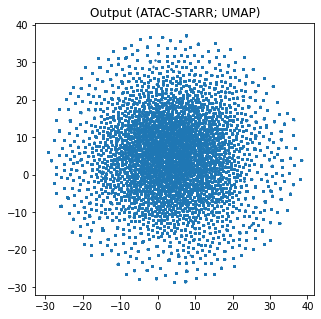

In [100]:
fig, ax = plt.subplots(figsize=(5, 5))

x = X1_ump[:,0]
y = X1_ump[:,1]
ax.scatter(x, y, s=1)
ax.set_title("Output (ATAC-STARR; UMAP)")
plt.show()

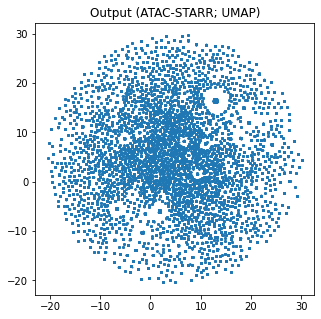

In [90]:
fig, ax = plt.subplots(figsize=(5, 5))

x = X1_sub_ump[:,0]
y = X1_sub_ump[:,1]
ax.scatter(x, y, s=1)
ax.set_title("Output (ATAC-STARR; UMAP)")
plt.show()

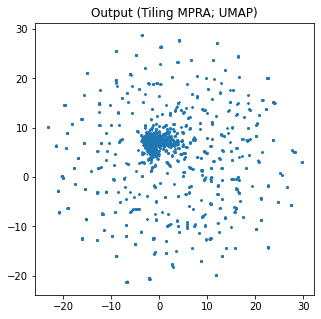

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))

x = X2_ump[:,0]
y = X2_ump[:,1]
ax.scatter(x, y, s=1)
ax.set_title("Output (Tiling MPRA; UMAP)")
plt.show()

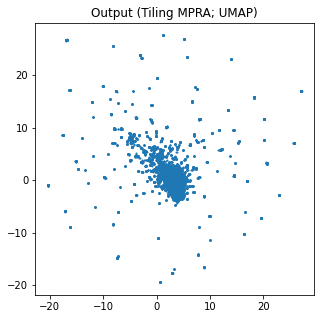

In [58]:
fig, ax = plt.subplots(figsize=(5, 5))

x = X2_sub_ump[:,0]
y = X2_sub_ump[:,1]
ax.scatter(x, y, s=1)
ax.set_title("Output (Tiling MPRA; UMAP)")
plt.show()

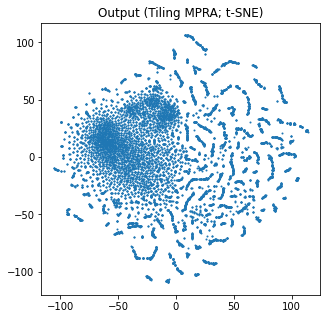

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
x = X2_tsn[:,0]
y = X2_tsn[:,1]
ax.scatter(x, y, s=1)
ax.set_title("Output (Tiling MPRA; t-SNE)")
plt.show()

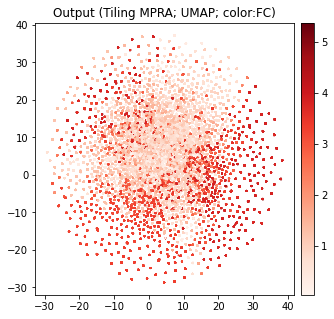

In [101]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Log2fc"]
c = np.exp2(c.to_numpy())
#c = c.to_numpy()

x = X1_ump[:,0]
y = X1_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (Tiling MPRA; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

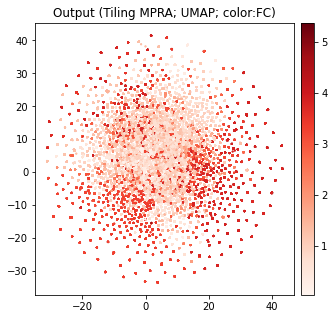

In [97]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Log2fc"]
c = np.exp2(c.to_numpy())
#c = c.to_numpy()

x = X1_ump[:,0]
y = X1_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (Tiling MPRA; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

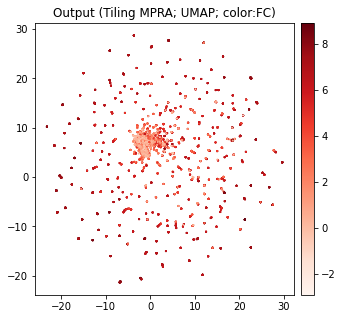

In [78]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_tmpra["Log2fc"]
#c = np.exp2(c.to_numpy())
c = c.to_numpy()

x = X2_ump[:,0]
y = X2_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (Tiling MPRA; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

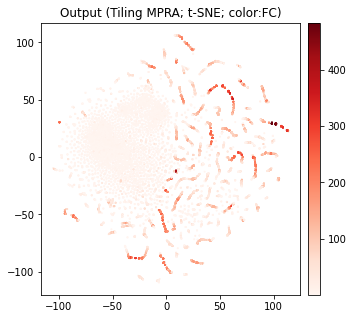

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_tmpra["Log2fc"]
c = np.exp2(c.to_numpy())

x = X2_tsn[:,0]
y = X2_tsn[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (Tiling MPRA; t-SNE; color:FC)")
set_colorbar(ax, im) 
plt.show()

In [18]:
np.exp2(c.to_numpy())

array([1.04731843, 1.23614456, 1.21406422, ..., 1.29223005, 1.3041775 ,
       1.29842407])